### 입력값 2개, 출력값 2개
### y1 = w1 * X1 + w2 * X2 + bias, y2 = w1 * X1 + w2 * X2 + bias

In [24]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np

import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [25]:
# 데이터
# x_train = np.array([[1, 5], [2, 6], [3, 7], [4, 8], [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14]])
x_train = np.array([[i, i] for i in range(1, 31)])
print(x_train.shape)
print(x_train[0].shape) # 한행의 구조
print(x_train)

(30, 2)
(2,)
[[ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [ 5  5]
 [ 6  6]
 [ 7  7]
 [ 8  8]
 [ 9  9]
 [10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]
 [20 20]
 [21 21]
 [22 22]
 [23 23]
 [24 24]
 [25 25]
 [26 26]
 [27 27]
 [28 28]
 [29 29]
 [30 30]]


In [26]:
# 컷번째 컬럼에는 2를 더함, 두번째 컬럼에는 5를 더함.
y_train = []
for i in range(len(x_train)): # [ 1  5]...
    y_train.append([x_train[i][0]+2, x_train[i][1]+5])

y_train = np.array(y_train)
print(y_train.shape)
print(y_train)

(30, 2)
[[ 3  6]
 [ 4  7]
 [ 5  8]
 [ 6  9]
 [ 7 10]
 [ 8 11]
 [ 9 12]
 [10 13]
 [11 14]
 [12 15]
 [13 16]
 [14 17]
 [15 18]
 [16 19]
 [17 20]
 [18 21]
 [19 22]
 [20 23]
 [21 24]
 [22 25]
 [23 26]
 [24 27]
 [25 28]
 [26 29]
 [27 30]
 [28 31]
 [29 32]
 [30 33]
 [31 34]
 [32 35]]


In [27]:
# del model # 객체 삭제
# tf.random.set_seed(0)
model = Sequential()
model.add(Dense(60, input_dim=2, activation='linear')) # 입력: 2, 출력: 60
model.add(Dense(80, activation='linear')) # 입력: 60, 출력: 80
model.add(Dense(20, activation='linear')) # 입력: 80, 출력: 20
model.add(Dense(2, activation='linear'))  # 입력: 20, 출력: 2
# model.compile(optimizer='adam', loss='mse')
model.compile(optimizer=Adam(lr=0.01), loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=100, batch_size=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                180       
_________________________________________________________________
dense_13 (Dense)             (None, 80)                4880      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                1620      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 42        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 67.9964 - val_loss: 60.5459
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 10.6685 - val_loss: 36.6246
Epoch 3/100
24/24 [=============================

24/24 [==============================] - 0s 3ms/step - loss: 0.1964 - val_loss: 1.4215
Epoch 72/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2509 - val_loss: 0.0163
Epoch 73/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1047 - val_loss: 9.8067
Epoch 74/100
24/24 [==============================] - 0s 3ms/step - loss: 1.6787 - val_loss: 5.1762
Epoch 75/100
24/24 [==============================] - 0s 3ms/step - loss: 1.7182 - val_loss: 39.9447
Epoch 76/100
24/24 [==============================] - 0s 3ms/step - loss: 21.4174 - val_loss: 157.4598
Epoch 77/100
24/24 [==============================] - 0s 3ms/step - loss: 42.5411 - val_loss: 8.6139
Epoch 78/100
24/24 [==============================] - 0s 3ms/step - loss: 7.7903 - val_loss: 57.8522
Epoch 79/100
24/24 [==============================] - 0s 3ms/step - loss: 17.6652 - val_loss: 1.2380
Epoch 80/100
24/24 [==============================] - 0s 3ms/step - loss: 3.6500 - val_loss: 11.7694
Epoch

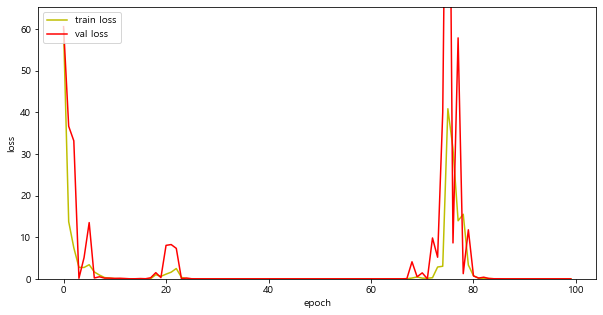

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 65.2674]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [29]:
# 테스트 데이터
x = np.array([[i, i] for i in range(100, 111)])
print(x.shape)
print(x[0].shape) # 한행의 구조
print(x)

(11, 2)
(2,)
[[100 100]
 [101 101]
 [102 102]
 [103 103]
 [104 104]
 [105 105]
 [106 106]
 [107 107]
 [108 108]
 [109 109]
 [110 110]]


In [30]:
y = [] # 찾아야할 데이터 비교용 생성
for i in range(len(x)): # [ 1  5]...
    y.append([x[i][0]+2, x[i][1]+5])

y = np.array(y)
print(y.shape)
print(y)

(11, 2)
[[102 105]
 [103 106]
 [104 107]
 [105 108]
 [106 109]
 [107 110]
 [108 111]
 [109 112]
 [110 113]
 [111 114]
 [112 115]]


x: [100 100], 실제값: [102 105], 예측값: 101.99981 105.00007, 정제된값: 102 105
x: [101 101], 실제값: [103 106], 예측값: 102.99980 106.00008, 정제된값: 103 106
x: [102 102], 실제값: [104 107], 예측값: 103.99979 107.00007, 정제된값: 104 107
x: [103 103], 실제값: [105 108], 예측값: 104.99979 108.00008, 정제된값: 105 108
x: [104 104], 실제값: [106 109], 예측값: 105.99979 109.00009, 정제된값: 106 109
x: [105 105], 실제값: [107 110], 예측값: 106.99979 110.00006, 정제된값: 107 110
x: [106 106], 실제값: [108 111], 예측값: 107.99979 111.00008, 정제된값: 108 111
x: [107 107], 실제값: [109 112], 예측값: 108.99978 112.00008, 정제된값: 109 112
x: [108 108], 실제값: [110 113], 예측값: 109.99979 113.00009, 정제된값: 110 113
x: [109 109], 실제값: [111 114], 예측값: 110.99977 114.00008, 정제된값: 111 114
x: [110 110], 실제값: [112 115], 예측값: 111.99979 115.00009, 정제된값: 112 115


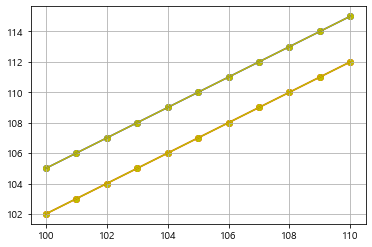

In [31]:
p = model.predict(x) # 모델 사용

for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.5f} {3:.5f}, 정제된값: {4:.0f} {5:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][1], p[i][0], p[i][1]))
    
plt.scatter(x[:,0], y[:,0], color='r')  # 실제값
plt.plot(x[:,0], y[:,0], color='r')
plt.scatter(x[:,0], p[:,0], color='y')  # 예측값
plt.plot(x[:,0], p[:,0], color='y')

plt.scatter(x[:,1], y[:,1], color='b')  # 실제값
plt.plot(x[:,1], y[:,1], color='b')
plt.scatter(x[:,1], p[:,1], color='y')  # 예측값
plt.plot(x[:,1], p[:,1], color='y')

plt.grid(True)
plt.show()    

In [32]:
model.save('./Basic4.h5')

In [33]:
!dir/w

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DC48-5F8B

 C:\kd\ws_python\notebook\machine\dnn\lm 디렉터리

[.]                  [..]                 [.ipynb_checkpoints]
Basic1.ipynb         Basic1.png           Basic2.ipynb
Basic3.ipynb         Basic3.png           Basic4.h5
Basic4.ipynb         Basic4.png           Basic4_use.ipynb
model.png            
              10개 파일             764,531 바이트
               3개 디렉터리  86,711,046,144 바이트 남음
